<a href="https://colab.research.google.com/github/14marcos1/ELT574_51687_ATIVIDADE_1_/blob/main/marcosPMC_com_Keras_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT574 - Aprendizado de Máquinas**
**Curso de Especialização em Inteligência Artificial e Computacional**



## Semana 2 - Redes Neurais Artificiais

### Aula 04 - Redes perceptron multicamadas (regressão)
##### Regressor com Keras

In [1]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.5.2
!pip install scikeras

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [2]:
from tensorflow import keras
from scikeras.wrappers import KerasRegressor

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV # implementa a k-fold cross-validation
from sklearn.model_selection import GridSearchCV # implementa a k-fold cross-validation com busca exaustiva
import pandas as pd
import numpy as np

Vamos fazer a estimação do preço das casas das vizinhanças da Califórnia. Este banco de dados já está limpo e sem as variáveis categóricas.

In [4]:
# baixando do github da disciplina
!wget https://raw.githubusercontent.com/nias-ufv/elt574-aprendizado-de-maquina/main/semana-2/features_housing.csv
!wget https://raw.githubusercontent.com/nias-ufv/elt574-aprendizado-de-maquina/main/semana-2/target_housing.csv

--2025-12-18 20:39:50--  https://raw.githubusercontent.com/nias-ufv/elt574-aprendizado-de-maquina/main/semana-2/features_housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1885453 (1.8M) [text/plain]
Saving to: ‘features_housing.csv’

features_housing.cs 100%[===================>]   1.80M  --.-KB/s    in 0.08s   

2025-12-18 20:39:51 (21.5 MB/s) - ‘features_housing.csv’ saved [1885453/1885453]

--2025-12-18 20:39:51--  https://raw.githubusercontent.com/nias-ufv/elt574-aprendizado-de-maquina/main/semana-2/target_housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP 

In [5]:
X = pd.read_csv("features_housing.csv")
X.pop('Unnamed: 0')
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y = pd.read_csv("target_housing.csv")
y.pop('Unnamed: 0')
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


Separando os dados entre dataset de treinamento e teste.

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25)

Pré-processamento dos dados (padronização)

In [8]:
columns = X_train.columns

In [9]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10966,3.9219,35.0,4.888587,0.932065,1239.0,3.366848,33.77,-117.89
14073,1.9152,28.0,3.782837,1.064799,1339.0,2.345009,32.76,-117.12
1743,1.8750,29.0,4.286682,1.182844,1357.0,3.063205,37.96,-122.35
16404,1.4732,28.0,4.960784,0.980392,201.0,3.941176,38.03,-121.16
965,7.3330,23.0,7.811189,0.944056,854.0,2.986014,37.68,-121.88


In [10]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10836.000000,10836.000000,10836.000000,10836.000000,10836.000000,10836.000000,10836.000000,10836.000000
mean,3.880378,28.668236,5.441598,1.097353,1445.122924,3.110948,35.645944,-119.581035
std,1.898491,12.668695,2.760101,0.538509,1205.771246,13.062767,2.145330,2.013189
min,0.499900,1.000000,0.846154,0.500000,6.000000,1.060606,32.540000,-124.300000
25%,2.573650,18.000000,4.452397,1.006359,788.750000,2.428060,33.930000,-121.810000
50%,3.541700,29.000000,5.234201,1.047869,1165.500000,2.812588,34.260000,-118.500000
75%,4.739700,37.000000,6.066124,1.099082,1737.000000,3.269793,37.720000,-118.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.470000


In [11]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
pd.DataFrame(X_train.round(3), columns=columns).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10836.000000,10836.000000,10836.000000,10836.000000,1.083600e+04,10836.000000,10836.000000,10836.000000
mean,0.000001,0.000012,-0.000001,-0.000003,-2.768549e-07,0.000001,-0.000019,-0.000011
std,1.000037,1.000072,1.000039,1.000050,1.000045e+00,1.000050,1.000044,1.000043
min,-1.781000,-2.184000,-1.665000,-1.109000,-1.194000e+00,-0.157000,-1.448000,-2.344000
25%,-0.688000,-0.842000,-0.358000,-0.169000,-5.442500e-01,-0.052000,-0.800000,-1.107000
50%,-0.178000,0.026000,-0.075000,-0.092000,-2.315000e-01,-0.023000,-0.646000,0.537000
75%,0.453000,0.658000,0.226250,0.003000,2.420000e-01,0.012000,0.967000,0.785000
max,5.857000,1.842000,49.445000,61.226000,2.839500e+01,94.948000,2.939000,2.539000


Vamos utilizar a API sequencial para construir, treinar, avaliar e usar a PMC de regressão, assim como fizemos na PMC de classificação. A diferença é que na camada de saída haverá apenas um neurônio, referente à variável do preço estimado.

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]), #camada de entrada
    keras.layers.Dense(1) # camada de saida
    ])
model.compile(loss='mean_squared_error', optimizer = 'sgd')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Treinando o modelo de PMC

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.7088 - val_loss: 0.9348
Epoch 2/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6509 - val_loss: 0.5028
Epoch 3/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4936 - val_loss: 0.4777
Epoch 4/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4570 - val_loss: 0.4445
Epoch 5/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4275 - val_loss: 0.4324
Epoch 6/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6076 - val_loss: 0.4344
Epoch 7/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4216 - val_loss: 0.4252
Epoch 8/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4088 - val_loss: 0.4250
Epoch 9/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4310 - val_loss: 0.4121
Epoch 10/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4175 - val_loss: 0.4085
Epoch 11/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4423 - val_loss: 0.4032
Epoch 12/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

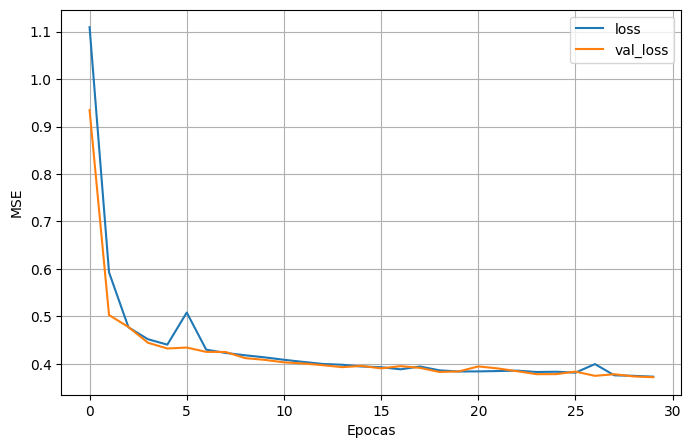

In [16]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel("Epocas")
plt.ylabel("MSE")
#plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Estimando o valor de algumas amostras não apresentadas durante o treinamento

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


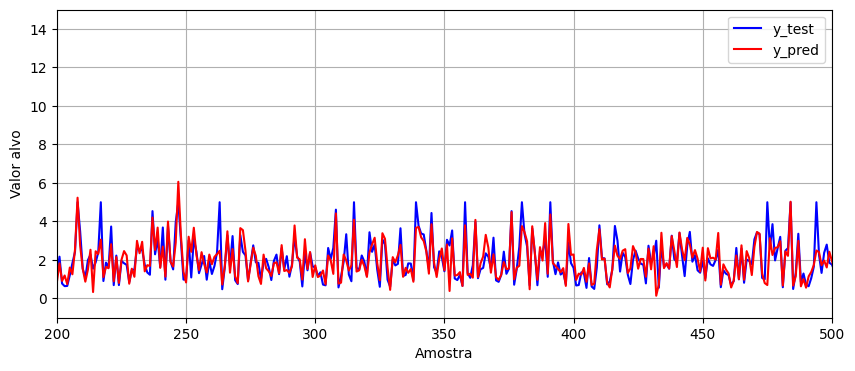

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3698  
O MSE do modelo foi 37.59017%.


In [17]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.grid(True)
plt.plot(range(0,len(y_test)),y_test, "b", label="y_test")
plt.plot(range(0,len(y_pred)),y_pred, "r", label="y_pred")
plt.axis([200, 500, -1, 15])
plt.xlabel("Amostra")
plt.ylabel("Valor alvo")
plt.legend()

plt.show()
mse_test = model.evaluate(X_test,y_test)
print(f"O MSE do modelo foi {mse_test*100:.5f}%.")

##### Busca dos melhores parâmetros para uma rede PMC

A quantidade de parâmetros para ser ajustado é a vantagem e a desvantagem das redes neurais. Por um lado, temos muitos parâmetros para ajustar o modelo da melhor forma aos dados. Por outro lado, existem muitas possibilidades para ajustar o modelo. Podemos fazer uma busca dos melhores parâmetros por meio do algoritmo de treinamento, sem precisar ajustar tudo manualmente.

> **Quantos neurônios devo utilizar?**
>
> Métodos para escolher a quantidade de neurônios na camada escondida.
- Método de Fletcher-Gloss: 2*sqrt(n) +n2 <= n1 <= 2*n+1
- Método de Kolmogorov: n1= 2*n+1
>
> Lembrar que é apenas um chute inicial.

Criando a função do modelo de regressor que será ajustado de forma automática.

In [18]:
# Criando uma funcao para representar o modelo que sera treinado

def build_model_reg(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(8,)):
    model = keras.models.Sequential()

    # camada de entrada
    model.add(keras.layers.InputLayer(input_shape=input_shape))

    # camadas ocultas
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))

    # camada de saida
    model.add(keras.layers.Dense(1))

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)

    return model

Definindo os parâmetros que serão variados:

In [ ]:
# Parametros simplificados
param_distribs = {
    "n_hidden": [1],
    "n_neurons": range(10,30,1),
    "learning_rate": [1e-3]
}

keras_reg = KerasRegressor(build_model_reg, n_hidden=param_distribs["n_hidden"],
                           n_neurons=param_distribs["n_neurons"],
                           learning_rate=param_distribs["learning_rate"],
                           verbose=1)

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_reg,  param_distribs, n_iter=5, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=50,
              validation_data=(X_valid,y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)] # parada precipitada para evitar overfitting. patience=10 deixa ate 10 epocas sem melhora no indicador de desempenho ('val_loss')
              )

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8617 - val_loss: 1.4175
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2038 - val_loss: 0.8612
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7428 - val_loss: 0.7405
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6720 - val_loss: 0.6991
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6226 - val_loss: 0.6773
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6552 - val_loss: 0.6602
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6163 - val_loss: 0.6456
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6451 - val_loss: 0.6324
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5758 - val_loss: 0.6201
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5913 - val_loss: 0.6092
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5728 - val_loss: 0.5991
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.2191 - val_loss: 1.3615
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0521 - val_loss: 0.8216
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7205 - val_loss: 0.6961
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6417 - val_loss: 0.6497
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6173 - val_loss: 0.6237
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5809 - val_loss: 0.6060
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5822 - val_loss: 0.5903
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5760 - val_loss: 0.5771
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5329 - val_loss: 0.5661
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5305 - val_loss: 0.5562
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5091 - val_loss: 0.5472
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8588 - val_loss: 1.3833
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1958 - val_loss: 0.9192
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8649 - val_loss: 0.7995
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7366 - val_loss: 0.7422
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7085 - val_loss: 0.7062
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6835 - val_loss: 0.6783
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6264 - val_loss: 0.6542
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6109 - val_loss: 0.6342
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6061 - val_loss: 0.6176
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6190 - val_loss: 0.6025
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6000 - val_loss: 0.5893
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.4034 - val_loss: 1.4418
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1537 - val_loss: 0.8878
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7849 - val_loss: 0.7745
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7073 - val_loss: 0.7333
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6945 - val_loss: 0.7087
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6593 - val_loss: 0.6896
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6818 - val_loss: 0.6728
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6195 - val_loss: 0.6577
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6046 - val_loss: 0.6445
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6147 - val_loss: 0.6326
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6162 - val_loss: 0.6209
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9926 - val_loss: 1.3149
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1012 - val_loss: 0.9912
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8702 - val_loss: 0.8916
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8343 - val_loss: 0.8356
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7943 - val_loss: 0.7939
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7374 - val_loss: 0.7597
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7101 - val_loss: 0.7306
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6859 - val_loss: 0.7051
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6638 - val_loss: 0.6833
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6136 - val_loss: 0.6636
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6123 - val_loss: 0.6468
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2624 - val_loss: 1.3268
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1188 - val_loss: 0.9676
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9050 - val_loss: 0.8571
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8040 - val_loss: 0.8001
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7664 - val_loss: 0.7596
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7618 - val_loss: 0.7300
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6869 - val_loss: 0.7045
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7018 - val_loss: 0.6819
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6299 - val_loss: 0.6633
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6683 - val_loss: 0.6463
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6094 - val_loss: 0.6300
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3433 - val_loss: 1.8921
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6030 - val_loss: 1.1741
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0582 - val_loss: 0.9203
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8507 - val_loss: 0.8287
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7881 - val_loss: 0.7841
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7347 - val_loss: 0.7575
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6721 - val_loss: 0.7376
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7105 - val_loss: 0.7192
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6893 - val_loss: 0.7041
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6790 - val_loss: 0.6910
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6255 - val_loss: 0.6786
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5065 - val_loss: 1.7394
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3886 - val_loss: 0.9689
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8506 - val_loss: 0.7983
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7389 - val_loss: 0.7448
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7066 - val_loss: 0.7162
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6892 - val_loss: 0.6998
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6572 - val_loss: 0.6874
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6685 - val_loss: 0.6755
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6476 - val_loss: 0.6663
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6366 - val_loss: 0.6574
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6482 - val_loss: 0.6487
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0190 - val_loss: 1.3069
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1100 - val_loss: 0.8797
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8463 - val_loss: 0.8008
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7730 - val_loss: 0.7681
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7445 - val_loss: 0.7432
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7222 - val_loss: 0.7227
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6743 - val_loss: 0.7046
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7285 - val_loss: 0.6887
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6609 - val_loss: 0.6731
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6103 - val_loss: 0.6593
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6366 - val_loss: 0.6459
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2113 - val_loss: 1.8735
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4839 - val_loss: 1.0737
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9069 - val_loss: 0.8423
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7997 - val_loss: 0.7683
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7186 - val_loss: 0.7345
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6913 - val_loss: 0.7126
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6795 - val_loss: 0.6952
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6602 - val_loss: 0.6800
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6790 - val_loss: 0.6661
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6100 - val_loss: 0.6536
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6370 - val_loss: 0.6420
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9880 - val_loss: 1.3895
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1795 - val_loss: 0.9738
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8341 - val_loss: 0.8585
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7810 - val_loss: 0.8047
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7479 - val_loss: 0.7712
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7241 - val_loss: 0.7441
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6895 - val_loss: 0.7213
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6760 - val_loss: 0.7013
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6605 - val_loss: 0.6840
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6432 - val_loss: 0.6669
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5899 - val_loss: 0.6514
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4118 - val_loss: 1.0585
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9528 - val_loss: 0.8131
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7453 - val_loss: 0.7562
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7087 - val_loss: 0.7195
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6677 - val_loss: 0.6914
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6723 - val_loss: 0.6704
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6682 - val_loss: 0.6523
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6084 - val_loss: 0.6376
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6162 - val_loss: 0.6258
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5999 - val_loss: 0.6138
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5868 - val_loss: 0.6026
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3030 - val_loss: 1.3964
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1356 - val_loss: 0.9583
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8447 - val_loss: 0.8234
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7828 - val_loss: 0.7525
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7201 - val_loss: 0.7067
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6959 - val_loss: 0.6727
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6321 - val_loss: 0.6466
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6026 - val_loss: 0.6253
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5716 - val_loss: 0.6074
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5841 - val_loss: 0.5919
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5763 - val_loss: 0.5772
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6767 - val_loss: 1.4224
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1507 - val_loss: 0.8667
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7576 - val_loss: 0.7280
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6742 - val_loss: 0.6699
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6354 - val_loss: 0.6390
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6105 - val_loss: 0.6186
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6011 - val_loss: 0.6056
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5723 - val_loss: 0.5950
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5680 - val_loss: 0.5862
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5478 - val_loss: 0.5795
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5442 - val_loss: 0.5731
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5050 - val_loss: 1.3275
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1577 - val_loss: 0.9331
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8594 - val_loss: 0.8203
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7419 - val_loss: 0.7647
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6915 - val_loss: 0.7267
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6728 - val_loss: 0.6964
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6548 - val_loss: 0.6709
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6096 - val_loss: 0.6497
Epoch 9/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5988 - val_loss: 0.6320
Epoch 10/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5940 - val_loss: 0.6151
Epoch 11/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5583 - val_loss: 0.6012
Epoch 12/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6003 - val_loss: 1.3090
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1162 - val_loss: 0.8976
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8335 - val_loss: 0.7882
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7490 - val_loss: 0.7348
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7055 - val_loss: 0.7004
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6725 - val_loss: 0.6730
Epoch 7/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6698 - val_loss: 0.6511
Epoch 8/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6361 - val_loss: 0.6341
Epoch 9/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6194 - val_loss: 0.6190
Epoch 10/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6065 - val_loss: 0.6051
Epoch 11/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5706 - val_loss: 0.5940
Epoch 12/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(learning_rate=[0.001], model=<function build_model_reg at 0x7d9b63ec1440>, n_hidden=[1], n_neurons=range(10, 30)),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.001],
                                        'n_hidden': [1],
                                        'n_neurons': range(10, 30)})

In [ ]:
mse_test = rnd_search_cv.best_estimator_.score(X_test,y_test)
print(f"O MSE do modelo foi {mse_test*100:.5f}%.")

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
O MSE do modelo foi 65.41429%.


In [ ]:
X_new = X_test[:10]
y_pred = rnd_search_cv.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.5063853 ],
       [2.977697  ],
       [1.566263  ],
       [0.84743404],
       [1.0553598 ],
       [0.89480174],
       [0.7264329 ],
       [2.1563191 ],
       [1.2097178 ],
       [1.0888791 ]], dtype=float32)

Agora já temos um objeto para ser treinado toda vez que for chamado. Precisamos definir quais hiperparâmetros serão alterados para encontrar a melhor configuração de rede PMC. Este processo pode levar algum tempo, não se preocupe (talvez horas).

In [ ]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV # implementa a k-fold cross-validation

param_distribs = {
    "n_hidden": [1, 2], # pode adicionar quantas camadas ocultas forem necessárias
    "n_neurons": np.arange(20,50,1),
    "optimizer": ["adam", "sgd"],
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv2 = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=0)
rnd_search_cv2.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid,y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9915 - val_loss: 0.6966
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6415 - val_loss: 0.5897
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5416 - val_loss: 0.5354
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5101 - val_loss: 0.5401
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4973 - val_loss: 0.4832
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4660 - val_loss: 0.5110
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4812 - val_loss: 0.4653
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4816 - val_loss: 0.4579
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4311 - val_loss: 0.4523
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4287 - val_loss: 0.4456
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4319 - val_loss: 0.4453
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7171 - val_loss: 0.7440
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6875 - val_loss: 0.6366
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5924 - val_loss: 0.5588
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5402 - val_loss: 0.5362
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4851 - val_loss: 0.5031
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4765 - val_loss: 0.4878
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4783 - val_loss: 0.4795
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4545 - val_loss: 0.4675
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4530 - val_loss: 0.4623
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4382 - val_loss: 0.4672
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4768 - val_loss: 0.4660
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5796 - val_loss: 1.0300
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3225 - val_loss: 0.6225
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5660 - val_loss: 0.5374
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5323 - val_loss: 0.5120
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5096 - val_loss: 0.4969
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4692 - val_loss: 0.4874
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4662 - val_loss: 0.4796
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4518 - val_loss: 0.4761
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4349 - val_loss: 0.4765
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4430 - val_loss: 0.4611
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4602 - val_loss: 0.4584
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5761 - val_loss: 1.2241
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7837 - val_loss: 0.5521
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5234 - val_loss: 0.4979
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4825 - val_loss: 0.4784
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4845 - val_loss: 0.4704
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4704 - val_loss: 0.4608
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4588 - val_loss: 0.4592
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4547 - val_loss: 0.4455
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4273 - val_loss: 0.4432
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4334 - val_loss: 0.4377
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4222 - val_loss: 0.4340
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3619 - val_loss: 0.6208
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5819 - val_loss: 0.5421
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5016 - val_loss: 0.5006
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5014 - val_loss: 0.4863
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4563 - val_loss: 0.7217
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5009 - val_loss: 0.4824
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4770 - val_loss: 0.4578
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4433 - val_loss: 0.4605
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4623 - val_loss: 0.4519
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4436 - val_loss: 0.4472
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4439 - val_loss: 0.4420
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6081 - val_loss: 0.6322
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5731 - val_loss: 0.5345
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5151 - val_loss: 0.5034
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4978 - val_loss: 0.4850
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4359 - val_loss: 0.4703
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4624 - val_loss: 0.4750
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4365 - val_loss: 0.4522
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4374 - val_loss: 0.4467
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4222 - val_loss: 0.4495
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4315 - val_loss: 0.4373
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4344 - val_loss: 0.4348
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1888 - val_loss: 0.9978
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8874 - val_loss: 0.7789
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7083 - val_loss: 0.6976
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6239 - val_loss: 0.6569
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6515 - val_loss: 0.6290
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5881 - val_loss: 0.6057
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5687 - val_loss: 0.5861
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5777 - val_loss: 0.5713
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5264 - val_loss: 0.5582
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5086 - val_loss: 0.5458
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5116 - val_loss: 0.5336
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8491 - val_loss: 0.9076
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7965 - val_loss: 0.7580
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7063 - val_loss: 0.6986
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6486 - val_loss: 0.6577
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6285 - val_loss: 0.6277
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5780 - val_loss: 0.6024
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5903 - val_loss: 0.5817
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5231 - val_loss: 0.5652
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5475 - val_loss: 0.5528
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5165 - val_loss: 0.5407
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5317 - val_loss: 0.5320
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6607 - val_loss: 1.5572
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1756 - val_loss: 0.9425
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8593 - val_loss: 0.8197
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7643 - val_loss: 0.7473
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7065 - val_loss: 0.6961
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6527 - val_loss: 0.6575
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5841 - val_loss: 0.6275
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5969 - val_loss: 0.6037
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5744 - val_loss: 0.5833
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5504 - val_loss: 0.5675
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5288 - val_loss: 0.5555
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4019 - val_loss: 1.5454
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4066 - val_loss: 0.9332
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8286 - val_loss: 0.7732
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7369 - val_loss: 0.7089
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6452 - val_loss: 0.6669
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6495 - val_loss: 0.6386
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6239 - val_loss: 0.6181
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5867 - val_loss: 0.5997
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5829 - val_loss: 0.5860
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5875 - val_loss: 0.5747
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5639 - val_loss: 0.5648
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4480 - val_loss: 1.6226
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3998 - val_loss: 1.1776
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0026 - val_loss: 0.9363
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8407 - val_loss: 0.8275
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7711 - val_loss: 0.7671
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7125 - val_loss: 0.7311
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7171 - val_loss: 0.7046
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6555 - val_loss: 0.6837
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6395 - val_loss: 0.6645
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6398 - val_loss: 0.6482
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5887 - val_loss: 0.6331
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1914 - val_loss: 0.9609
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8718 - val_loss: 0.8272
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7703 - val_loss: 0.7568
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7294 - val_loss: 0.7054
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6635 - val_loss: 0.6655
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6284 - val_loss: 0.6347
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5867 - val_loss: 0.6085
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5749 - val_loss: 0.5863
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5641 - val_loss: 0.5689
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5366 - val_loss: 0.5525
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5122 - val_loss: 0.5413
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0061 - val_loss: 0.9446
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6990 - val_loss: 0.6117
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5676 - val_loss: 0.6433
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5463 - val_loss: 0.5259
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4655 - val_loss: 0.4926
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4979 - val_loss: 0.5086
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4640 - val_loss: 0.4694
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4581 - val_loss: 0.4521
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4516 - val_loss: 0.4465
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4263 - val_loss: 0.4342
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4078 - val_loss: 0.4272
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6792 - val_loss: 0.6314
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5590 - val_loss: 0.5393
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5061 - val_loss: 0.5059
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4796 - val_loss: 0.4766
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4529 - val_loss: 0.4634
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4465 - val_loss: 0.4548
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4288 - val_loss: 0.4468
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4211 - val_loss: 0.4365
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4188 - val_loss: 0.4389
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4256 - val_loss: 0.4223
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4068 - val_loss: 0.4236
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5704 - val_loss: 0.6095
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5794 - val_loss: 0.5477
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5229 - val_loss: 0.4985
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4583 - val_loss: 0.4706
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4569 - val_loss: 0.4589
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4388 - val_loss: 0.4456
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4137 - val_loss: 0.4426
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4134 - val_loss: 0.4304
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4098 - val_loss: 0.4244
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4160 - val_loss: 0.4224
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4024 - val_loss: 0.4102
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2467 - val_loss: 0.5858
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5150 - val_loss: 0.4820
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4688 - val_loss: 0.4805
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4502 - val_loss: 0.4458
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4164 - val_loss: 0.4237
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4030 - val_loss: 0.4373
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3880 - val_loss: 0.4176
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4323 - val_loss: 0.4051
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3755 - val_loss: 0.3963
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4106 - val_loss: 0.4001
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4074 - val_loss: 0.3934
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0860 - val_loss: 0.5511
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5038 - val_loss: 0.4914
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4628 - val_loss: 0.4634
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4343 - val_loss: 0.4415
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4474 - val_loss: 0.4759
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4636 - val_loss: 0.4299
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4090 - val_loss: 0.4382
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3825 - val_loss: 0.4048
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3757 - val_loss: 0.4031
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3927 - val_loss: 0.3913
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4022 - val_loss: 0.4088
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3227 - val_loss: 0.5419
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5809 - val_loss: 0.4560
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4502 - val_loss: 0.4272
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4252 - val_loss: 0.4163
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3981 - val_loss: 0.4039
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4113 - val_loss: 0.3989
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3779 - val_loss: 0.3891
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3944 - val_loss: 0.3809
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3706 - val_loss: 0.3884
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3701 - val_loss: 0.3848
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3885 - val_loss: 0.3708
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3963 - val_loss: 0.7917
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6812 - val_loss: 0.6512
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6011 - val_loss: 0.6141
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5875 - val_loss: 0.5873
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5686 - val_loss: 0.5650
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5546 - val_loss: 0.5535
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5318 - val_loss: 0.5406
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5509 - val_loss: 0.5317
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4817 - val_loss: 0.5244
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5099 - val_loss: 0.5168
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4713 - val_loss: 0.5088
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1435 - val_loss: 0.9106
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8102 - val_loss: 0.7246
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6577 - val_loss: 0.6647
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6028 - val_loss: 0.6208
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6023 - val_loss: 0.5906
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5405 - val_loss: 0.5664
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5250 - val_loss: 0.5497
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5164 - val_loss: 0.5329
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5410 - val_loss: 0.5234
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4955 - val_loss: 0.5121
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4759 - val_loss: 0.5033
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9357 - val_loss: 0.9433
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8754 - val_loss: 0.7575
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7171 - val_loss: 0.7009
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6660 - val_loss: 0.6610
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6321 - val_loss: 0.6283
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5842 - val_loss: 0.6015
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5532 - val_loss: 0.5788
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5431 - val_loss: 0.5580
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5649 - val_loss: 0.5431
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5329 - val_loss: 0.5286
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5185 - val_loss: 0.5177
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9425 - val_loss: 1.3805
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1618 - val_loss: 0.9485
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8637 - val_loss: 0.8111
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7941 - val_loss: 0.7443
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7166 - val_loss: 0.7030
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6699 - val_loss: 0.6758
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6515 - val_loss: 0.6564
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5951 - val_loss: 0.6405
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6534 - val_loss: 0.6272
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5932 - val_loss: 0.6161
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5769 - val_loss: 0.6061
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3279 - val_loss: 1.3915
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1656 - val_loss: 0.9055
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8505 - val_loss: 0.7776
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7302 - val_loss: 0.7282
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7054 - val_loss: 0.7025
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6892 - val_loss: 0.6824
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6803 - val_loss: 0.6668
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6365 - val_loss: 0.6531
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6097 - val_loss: 0.6400
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6105 - val_loss: 0.6293
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6019 - val_loss: 0.6186
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6146 - val_loss: 1.4374
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2490 - val_loss: 0.9718
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9007 - val_loss: 0.8580
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8223 - val_loss: 0.8112
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7783 - val_loss: 0.7790
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7519 - val_loss: 0.7557
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7343 - val_loss: 0.7339
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6988 - val_loss: 0.7158
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6816 - val_loss: 0.6977
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6431 - val_loss: 0.6826
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6767 - val_loss: 0.6664
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4597 - val_loss: 0.7817
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7715 - val_loss: 0.6870
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6302 - val_loss: 0.6382
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6187 - val_loss: 0.6062
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5619 - val_loss: 0.5778
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5236 - val_loss: 0.5590
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5262 - val_loss: 0.5461
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5240 - val_loss: 0.5299
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5112 - val_loss: 0.5221
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5049 - val_loss: 0.5124
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5044 - val_loss: 0.5075
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9336 - val_loss: 0.8634
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7550 - val_loss: 0.7117
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6626 - val_loss: 0.6450
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5927 - val_loss: 0.6053
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5658 - val_loss: 0.5791
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5398 - val_loss: 0.5568
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5209 - val_loss: 0.5433
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5106 - val_loss: 0.5325
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4980 - val_loss: 0.5214
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5048 - val_loss: 0.5157
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4996 - val_loss: 0.5065
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0920 - val_loss: 0.8750
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7927 - val_loss: 0.7426
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7056 - val_loss: 0.6857
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6601 - val_loss: 0.6517
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6083 - val_loss: 0.6228
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5953 - val_loss: 0.5997
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5754 - val_loss: 0.5812
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5569 - val_loss: 0.5658
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5363 - val_loss: 0.5556
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5345 - val_loss: 0.5483
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5495 - val_loss: 0.5371
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6456 - val_loss: 0.7648
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5926 - val_loss: 0.5558
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4971 - val_loss: 0.5130
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4877 - val_loss: 0.4957
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4734 - val_loss: 0.4871
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4407 - val_loss: 0.4766
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4528 - val_loss: 0.4760
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4782 - val_loss: 0.4707
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4480 - val_loss: 0.4654
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4408 - val_loss: 0.4613
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4413 - val_loss: 0.4619
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1706 - val_loss: 0.7366
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6779 - val_loss: 0.6281
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5735 - val_loss: 0.5738
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5469 - val_loss: 0.5379
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5607 - val_loss: 0.5158
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5503 - val_loss: 0.5034
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4995 - val_loss: 0.5121
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4596 - val_loss: 0.4884
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5099 - val_loss: 0.5090
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5064 - val_loss: 0.4860
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4425 - val_loss: 0.4682
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1646 - val_loss: 0.6146
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5949 - val_loss: 0.5417
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5264 - val_loss: 0.5123
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5405 - val_loss: 0.4972
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4879 - val_loss: 0.4873
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4872 - val_loss: 0.4831
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4849 - val_loss: 0.4916
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4793 - val_loss: 0.4699
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4472 - val_loss: 0.4690
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4374 - val_loss: 0.4699
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4455 - val_loss: 0.4589
Epoch 12/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3835 - val_loss: 0.6869
Epoch 2/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5796 - val_loss: 0.5255
Epoch 3/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4891 - val_loss: 0.4712
Epoch 4/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4534 - val_loss: 0.4548
Epoch 5/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4643 - val_loss: 0.4372
Epoch 6/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4309 - val_loss: 0.4228
Epoch 7/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4152 - val_loss: 0.4084
Epoch 8/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4007 - val_loss: 0.4016
Epoch 9/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4045 - val_loss: 0.3985
Epoch 10/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3886 - val_loss: 0.4167
Epoch 11/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3944 - val_loss: 0.3880
Epoch 12/100
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(learning_rate=[0.001], model=<function build_model_reg at 0x7d9b63ec1440>, n_hidden=[1], n_neurons=range(10, 30)),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d9b60541150>,
                                        'n_hidden': [1, 2],
                                        'n_neurons': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'optimizer': ['adam', 'sgd']})

Ao finalizar o treinamento, podemos acessar os melhores hiperparâmetros de acordo com a função de desempenho. Todos os parâmetros utilizados durante os n_inter treinamentos são relacionados pelo atributo $ cv_results_ $.

In [ ]:
rnd_search_cv2.cv_results_

{'mean_fit_time': array([97.33994039, 91.08007201, 99.58333906, 97.78029807, 96.21461765,
        97.26232815, 97.77128124, 91.92402665, 91.73801939, 99.57412092]),
 'std_fit_time': array([1.60167105, 1.66609327, 3.30358675, 1.99661909, 3.21303227,
        3.02639131, 0.8824784 , 3.19258691, 2.01548127, 1.72437444]),
 'mean_score_time': array([0.29219588, 0.45379885, 0.68150751, 0.35496132, 0.471006  ,
        0.34791112, 0.37022877, 0.34873048, 0.33450452, 0.33280969]),
 'std_score_time': array([0.00715769, 0.18649478, 0.2209168 , 0.01156628, 0.18009866,
        0.01275945, 0.00883842, 0.01939412, 0.02084001, 0.02218677]),
 'param_learning_rate': masked_array(data=[0.006844306273669504, 0.008457132846715369,
                    0.0012480684338882157, 0.0009072274874649723,
                    0.00794764031013359, 0.02504338004219832,
                    0.0014707555215426602, 0.0008136526301705084,
                    0.0025213381295341687, 0.007267282249599731],
              mask=[F

Os melhores parâmetros são armazenados nos atributos $ best_params_ $ e $best_score_$.

In [ ]:
rnd_search_cv2.best_params_a

{'learning_rate': np.float64(0.00794764031013359),
 'n_hidden': 2,
 'n_neurons': np.int64(41),
 'optimizer': 'sgd'}

In [ ]:
rnd_search_cv2.best_score_

np.float64(0.7609090315059025)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


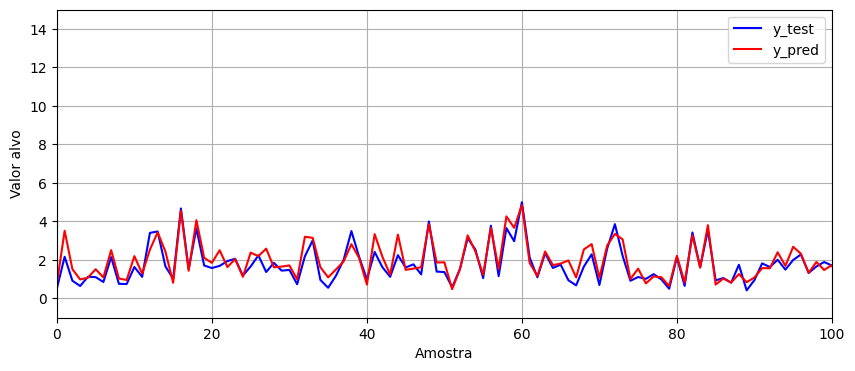

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

y_pred = rnd_search_cv2.best_estimator_.predict(X_test)

plt.figure(figsize=(10, 4))
plt.grid(True)
plt.plot(range(0,len(y_test)),y_test, "b", label="y_test")
plt.plot(range(0,len(y_pred)),y_pred, "r", label="y_pred")
plt.axis([0, 100, -1, 15])
plt.xlabel("Amostra")
plt.ylabel("Valor alvo")
plt.legend()

plt.show()

#### Conhecendo a estrutura, salvando e importando o modelo

##### Estrutura do modelo

É possível conhecer a estrutura do modelo utilizando o `plot_model` do Keras.

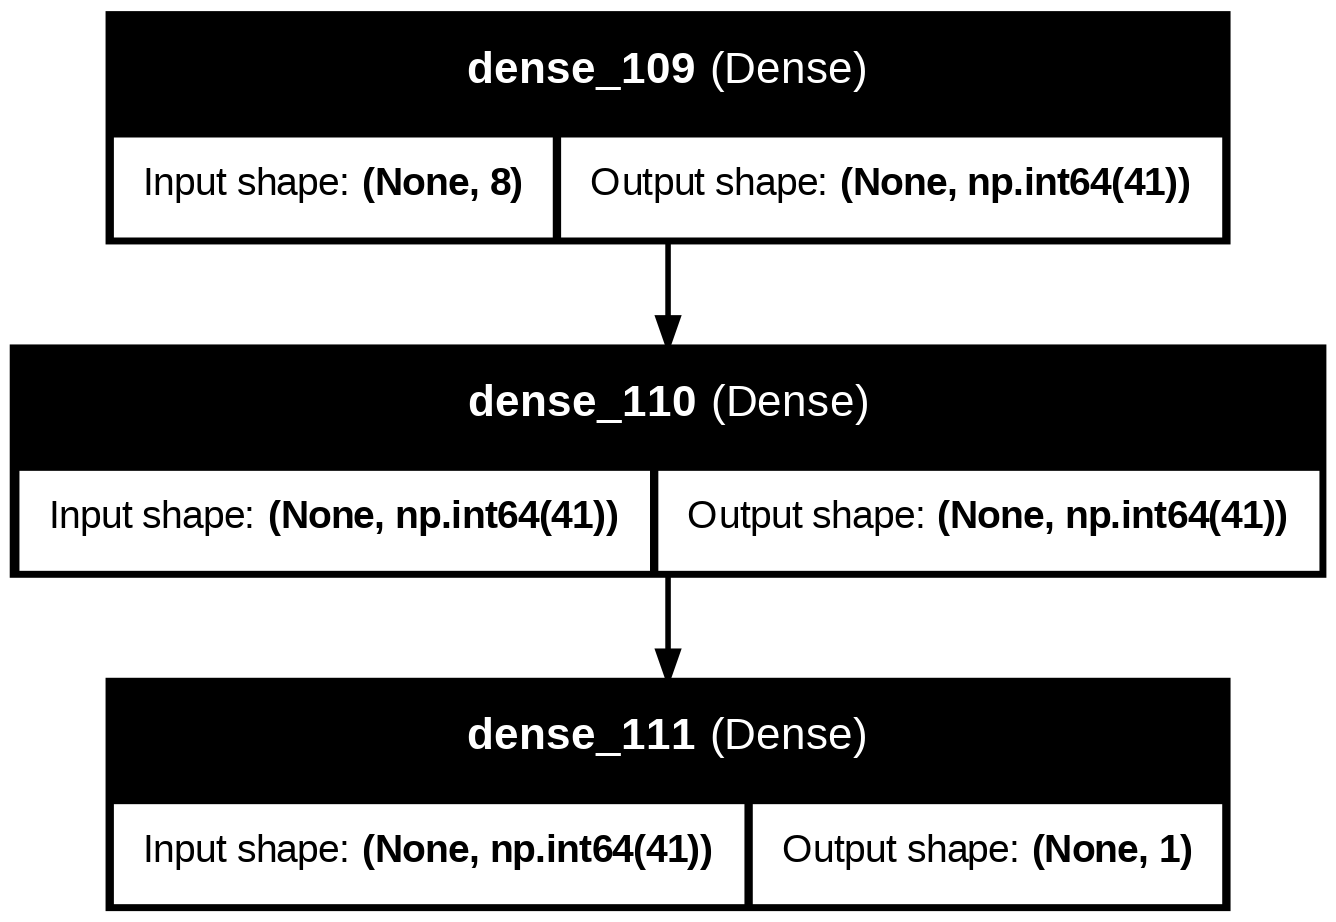

In [ ]:
model = rnd_search_cv2.best_estimator_.model_

from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Podemos utilizar a biblioteca Pickle para salvar (serializar) um modelo treinado.

In [ ]:
import pickle

with open('modelo_salvo.pickle', 'wb') as f:
    # 'modelo_salvo.pickle' é o nome do arquivo que sera criado
    # o parâmetro 'wb' é para w: write; e b: binário

    # vamos salvar o modelo 'model' dentro do arquivo 'modelo_salvo.pickle'
    pickle.dump(model, f)

O modelo pode ser carregado novamente em outra aplicação por meio do próprio Pickle.

**Cuidado: quando você receber um arquivo de uma fonte não confiável, não carregue. É possível infectar o arquivo com alguma informação nociva.**

In [ ]:
with open('modelo_salvo.pickle', 'rb') as f:
    # 'modelo_salvo.pickle' é o nome do arquivo que sera lido
    # o parâmetro 'rb' é para r: read; e b: binário

    # vamos salvar o modelo 'model' dentro do arquivo 'modelo_salvo.pickle'
    modelo_carregado = pickle.load(f)

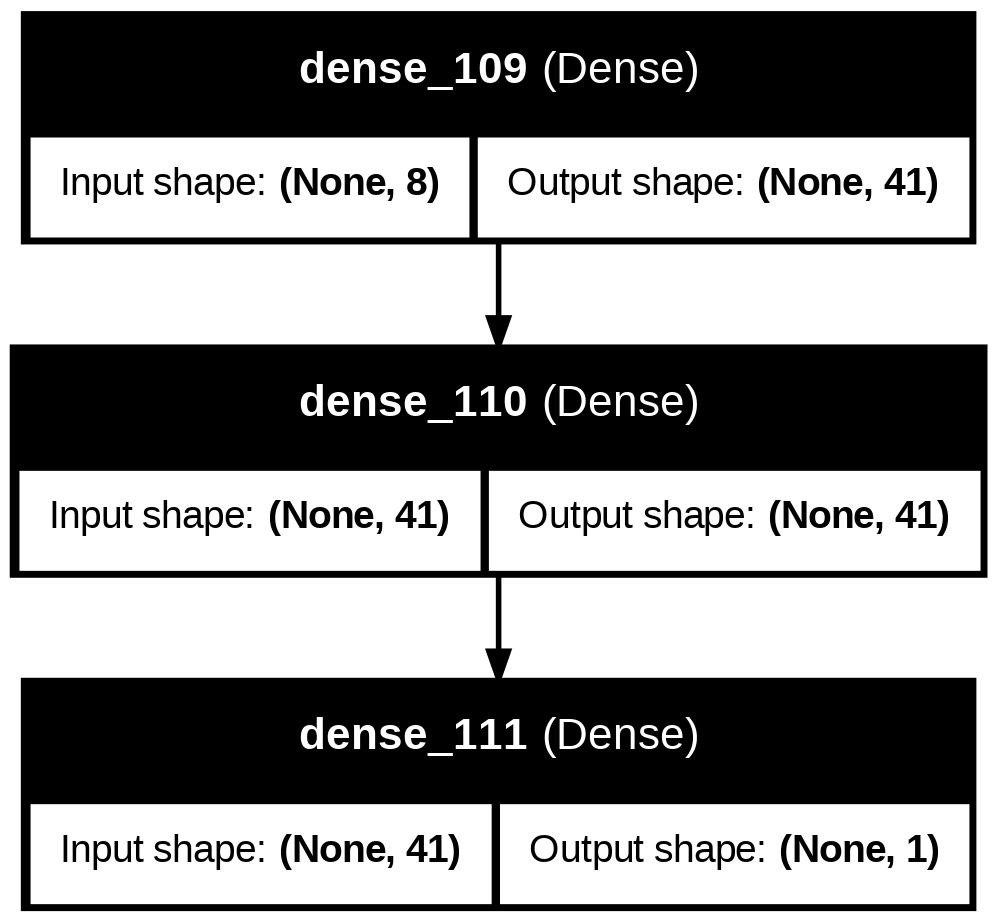

In [ ]:
from keras.utils import plot_model
plot_model(modelo_carregado, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

___
___
___

#### Função ajustar os hiperparâmetros do problema de classificação multiclasse

In [ ]:
# funcao para criar o modelo

def build_model_clf(n_hidden=1, n_neurons=30, learning_rate=3e-3, optimizer='adam', activation='relu', input_shape=[28,28]):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape)) #camada de achatamento da matriz 28x28 da imagem
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(10, activation="softmax")) #camada de saida com 10 saidas e funcao softmax (calcula probabilidade da classe)

  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=["accuracy"])
  #model.summary()
  return model

In [ ]:
# instanciar objeto para fazer o ajuste de hiperparametros e treinamento do modelo

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# hipermarametros que serao alterados
param_distribs = {
    "n_hidden": [1, 2], # pode adicionar quantas camadas ocultas forem necessárias
    "n_neurons": np.arange(20,50),
    "learning_rate": reciprocal(3e-4, 3e-2),
    "activation": ['relu', 'sigmoid', 'tanh'],
    #"optimizer": ['adam', 'sgd', 'rmsprop']
}

# Instanciando o modelo
model = KerasClassifier(build_fn=build_model_clf, epochs=10, batch_size=32)

# # Realizando a busca exaustiva
# grid_search = GridSearchCV(estimator=model, param_grid=param_distribs, cv=3)
# grid_search_result = grid_search.fit(X_train, y_train)

# Realizando a busca aleatória
random_search = RandomizedSearchCV(estimator=model, param_grid=param_distribs, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train, y_train)